In [1]:
# import libraries
import numpy as np
import pandas as pd

#  for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import zscore, boxcox, skew
from scipy.stats import shapiro
import statsmodels.api as sm

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Problem Statement

# Data Gathering

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.head(1).T

,0
area_type,Super built-up Area
availability,19-Dec
location,Electronic City Phase II
size,2 BHK
society,Coomee
total_sqft,1056
bath,2.0
balcony,1.0
price,39.07


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### 1. area_type 

In [7]:
df['area_type']

0        Super built-up  Area
1                  Plot  Area
2              Built-up  Area
3        Super built-up  Area
4        Super built-up  Area
                 ...         
13315          Built-up  Area
13316    Super built-up  Area
13317          Built-up  Area
13318    Super built-up  Area
13319    Super built-up  Area
Name: area_type, Length: 13320, dtype: object

In [8]:
df['area_type'].nunique()

4

In [9]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [10]:
df['area_type'].isna().sum()

0

In [11]:
df = pd.get_dummies(df, columns = ['area_type'])
df

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,0,1
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,0,1,0
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,1,0,0,0
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,0,1
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,1,0,0,0
13316,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,0,0,0,1
13317,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,1,0,0,0
13318,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,0,0,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   availability                    13320 non-null  object 
 1   location                        13319 non-null  object 
 2   size                            13304 non-null  object 
 3   society                         7818 non-null   object 
 4   total_sqft                      13320 non-null  object 
 5   bath                            13247 non-null  float64
 6   balcony                         12711 non-null  float64
 7   price                           13320 non-null  float64
 8   area_type_Built-up  Area        13320 non-null  uint8  
 9   area_type_Carpet  Area          13320 non-null  uint8  
 10  area_type_Plot  Area            13320 non-null  uint8  
 11  area_type_Super built-up  Area  13320 non-null  uint8  
dtypes: float64(3), object(5), uint8(

#### 2. availability

In [13]:
df['availability']

0               19-Dec
1        Ready To Move
2        Ready To Move
3        Ready To Move
4        Ready To Move
             ...      
13315    Ready To Move
13316    Ready To Move
13317    Ready To Move
13318           18-Jun
13319    Ready To Move
Name: availability, Length: 13320, dtype: object

In [14]:
df['availability'].nunique()

81

In [15]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [16]:
df['availability'].isna().sum()

0

In [17]:
df = df.drop('availability', axis = 1)
df

,location,size,society,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,0,1
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,0,1,0
2,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,1,0,0,0
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,0,1
4,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,1,0,0,0
13316,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,0,0,0,1
13317,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,1,0,0,0
13318,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,0,0,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   location                        13319 non-null  object 
 1   size                            13304 non-null  object 
 2   society                         7818 non-null   object 
 3   total_sqft                      13320 non-null  object 
 4   bath                            13247 non-null  float64
 5   balcony                         12711 non-null  float64
 6   price                           13320 non-null  float64
 7   area_type_Built-up  Area        13320 non-null  uint8  
 8   area_type_Carpet  Area          13320 non-null  uint8  
 9   area_type_Plot  Area            13320 non-null  uint8  
 10  area_type_Super built-up  Area  13320 non-null  uint8  
dtypes: float64(3), object(4), uint8(4)
memory usage: 780.6+ KB


#### 3. location

In [19]:
df['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [20]:
df['location'].nunique()

1305

In [21]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [22]:
df['location'].isna().sum()

1

In [23]:
df['location'].fillna(df['location'].mode()[0], inplace = True)

In [24]:
df['location'].isna().sum()

0

In [25]:
df = pd.get_dummies(df, columns = ['location'])
df

,size,society,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled
0,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3 BHK,NaN,1440,2.0,3.0,62.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,4 BHK,NaN,3600,5.0,NaN,400.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13317,2 BHK,Mahla T,1141,2.0,1.0,60.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4 BHK,SollyCl,4689,4.0,1.0,488.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 1315 entries, size to location_whitefiled
dtypes: float64(3), object(3), uint8(1309)
memory usage: 17.2+ MB


#### 4. size

In [27]:
df['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

In [28]:
df['size'].nunique()

31

In [29]:
df['size'].value_counts().to_dict()

{'2 BHK': 5199,
 '3 BHK': 4310,
 '4 Bedroom': 826,
 '4 BHK': 591,
 '3 Bedroom': 547,
 '1 BHK': 538,
 '2 Bedroom': 329,
 '5 Bedroom': 297,
 '6 Bedroom': 191,
 '1 Bedroom': 105,
 '8 Bedroom': 84,
 '7 Bedroom': 83,
 '5 BHK': 59,
 '9 Bedroom': 46,
 '6 BHK': 30,
 '7 BHK': 17,
 '1 RK': 13,
 '10 Bedroom': 12,
 '9 BHK': 8,
 '8 BHK': 5,
 '11 BHK': 2,
 '11 Bedroom': 2,
 '10 BHK': 2,
 '14 BHK': 1,
 '13 BHK': 1,
 '12 Bedroom': 1,
 '27 BHK': 1,
 '43 Bedroom': 1,
 '16 BHK': 1,
 '19 BHK': 1,
 '18 Bedroom': 1}

In [30]:
df['size'].isna().sum()

16

In [31]:
df['size'].fillna(df['size'].mode()[0], inplace = True)

In [32]:
df['size'].isna().sum()

0

In [33]:
df['size'].replace({'2 BHK': 2,
 '3 BHK': 3,
 '4 Bedroom': 4,
 '4 BHK': 4,
 '3 Bedroom': 3,
 '1 BHK': 1,
 '2 Bedroom': 2,
 '5 Bedroom': 5,
 '6 Bedroom': 6,
 '1 Bedroom': 1,
 '8 Bedroom': 8,
 '7 Bedroom': 7,
 '5 BHK': 5,
 '9 Bedroom': 9,
 '6 BHK': 6,
 '7 BHK': 7,
 '1 RK': 1,
 '10 Bedroom': 10,
 '9 BHK': 9,
 '8 BHK': 8,
 '11 BHK': 11,
 '11 Bedroom': 11,
 '10 BHK': 10,
 '14 BHK': 14,
 '13 BHK': 13,
 '12 Bedroom': 12,
 '27 BHK': 27,
 '43 Bedroom': 43,
 '16 BHK': 16,
 '19 BHK': 19,
 '18 Bedroom': 18} , inplace = True)

In [34]:
size_dict = {'2 BHK': 2,
 '3 BHK': 3,
 '4 Bedroom': 4,
 '4 BHK': 4,
 '3 Bedroom': 3,
 '1 BHK': 1,
 '2 Bedroom': 2,
 '5 Bedroom': 5,
 '6 Bedroom': 6,
 '1 Bedroom': 1,
 '8 Bedroom': 8,
 '7 Bedroom': 7,
 '5 BHK': 5,
 '9 Bedroom': 9,
 '6 BHK': 6,
 '7 BHK': 7,
 '1 RK': 1,
 '10 Bedroom': 10,
 '9 BHK': 9,
 '8 BHK': 8,
 '11 BHK': 11,
 '11 Bedroom': 11,
 '10 BHK': 10,
 '14 BHK': 14,
 '13 BHK': 13,
 '12 Bedroom': 12,
 '27 BHK': 27,
 '43 Bedroom': 43,
 '16 BHK': 16,
 '19 BHK': 19,
 '18 Bedroom': 18} 
size_dict

{'2 BHK': 2,
 '3 BHK': 3,
 '4 Bedroom': 4,
 '4 BHK': 4,
 '3 Bedroom': 3,
 '1 BHK': 1,
 '2 Bedroom': 2,
 '5 Bedroom': 5,
 '6 Bedroom': 6,
 '1 Bedroom': 1,
 '8 Bedroom': 8,
 '7 Bedroom': 7,
 '5 BHK': 5,
 '9 Bedroom': 9,
 '6 BHK': 6,
 '7 BHK': 7,
 '1 RK': 1,
 '10 Bedroom': 10,
 '9 BHK': 9,
 '8 BHK': 8,
 '11 BHK': 11,
 '11 Bedroom': 11,
 '10 BHK': 10,
 '14 BHK': 14,
 '13 BHK': 13,
 '12 Bedroom': 12,
 '27 BHK': 27,
 '43 Bedroom': 43,
 '16 BHK': 16,
 '19 BHK': 19,
 '18 Bedroom': 18}

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 1315 entries, size to location_whitefiled
dtypes: float64(3), int64(1), object(2), uint8(1309)
memory usage: 17.2+ MB


#### 5. society

In [36]:
df['society']

0        Coomee 
1        Theanmp
2            NaN
3        Soiewre
4            NaN
          ...   
13315    ArsiaEx
13316        NaN
13317    Mahla T
13318    SollyCl
13319        NaN
Name: society, Length: 13320, dtype: object

In [37]:
df['society'].nunique()

2689

In [38]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
JaghtDe     1
Jauraht     1
Brity U     1
AcisePa     1
RSntsAp     1
Name: society, Length: 2689, dtype: int64

In [39]:
df['society'].isna().sum()

5502

In [40]:
df = df.drop('society', axis = 1)
df

,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Anekal,...,location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled
0,2,1056,2.0,1.0,39.07,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2600,5.0,3.0,120.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1440,2.0,3.0,62.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1521,3.0,1.0,95.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1200,2.0,1.0,51.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,5,3453,4.0,0.0,231.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,4,3600,5.0,NaN,400.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13317,2,1141,2.0,1.0,60.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4,4689,4.0,1.0,488.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 1314 entries, size to location_whitefiled
dtypes: float64(3), int64(1), object(1), uint8(1309)
memory usage: 17.1+ MB


#### 6. total_sqft

In [42]:
df['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13320, dtype: object

In [43]:
df['total_sqft'].nunique()

2119

In [44]:
df['total_sqft'].value_counts()

1200           843
1100           221
1500           205
2400           196
600            180
              ... 
888 - 1290       1
1360 - 1890      1
2370             1
5                1
4689             1
Name: total_sqft, Length: 2119, dtype: int64

In [45]:
df['total_sqft'].isna().sum()

0

In [51]:
df = df.drop('total_sqft', axis = 1)
df

,size,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Anekal,location_ Banaswadi,...,location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled
0,2,2.0,1.0,39.07,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,5.0,3.0,120.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2.0,3.0,62.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3.0,1.0,95.00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2.0,1.0,51.00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,5,4.0,0.0,231.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,4,5.0,NaN,400.00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,2,2.0,1.0,60.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4,4.0,1.0,488.00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 1314 entries, size to location_whitefiled
dtypes: float64(3), int64(1), object(1), uint8(1309)
memory usage: 17.1+ MB


#### 7. bath

In [52]:
df['bath']

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13320, dtype: float64

In [53]:
df['bath'].nunique()

19

In [54]:
df['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [55]:
df['bath'].isna().sum()

73

In [56]:
df['bath'].fillna(df['bath'].median(), inplace = True)

In [57]:
df['bath'].isna().sum()

0

#### 8. balcony

In [58]:
df['balcony']

0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
13315    0.0
13316    NaN
13317    1.0
13318    1.0
13319    1.0
Name: balcony, Length: 13320, dtype: float64

In [59]:
df['balcony'].nunique()

4

In [60]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [61]:
df['balcony'].isna().sum()

609

In [62]:
df['balcony'].fillna(df['balcony'].median(), inplace = True)

In [63]:
df['balcony'].isna().sum()

0

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 1313 entries, size to location_whitefiled
dtypes: float64(3), int64(1), uint8(1309)
memory usage: 17.0 MB


In [65]:
df.shape

(13320, 1313)

# Feature Engineering

#### 1. size

<AxesSubplot:>

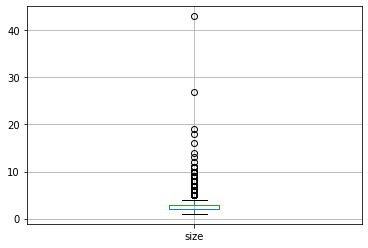

In [66]:
df[['size']].boxplot()

In [67]:
q1 = df['size'].quantile(0.25)
q2 = df['size'].quantile(0.50) 
q3 = df['size'].quantile(0.75)

iqr = q3-q1

upper_bound = q3+1.5*(iqr)
lower_bound = q1-1.5*(iqr)

print("q1 :",q1)
print("q3 :",q3)
print("iqr :",iqr)
print("upper_bound :",upper_bound)
print("lower_bound :",lower_bound)

q1 : 2.0
q3 : 3.0
iqr : 1.0
upper_bound : 4.5
lower_bound : 0.5


In [68]:
size_med = df[["size"]].loc[(df['size']<upper_bound) & (df['size']>lower_bound)].median()[0]
size_med

3.0

In [69]:
# replacing outliers by median
df.loc[(df['size']>upper_bound) | (df['size']<lower_bound),'size'] = size_med 

<AxesSubplot:>

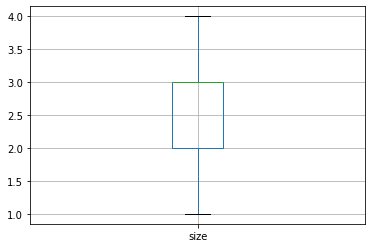

In [70]:
df[['size']].boxplot()

#### 2. bath

<AxesSubplot:>

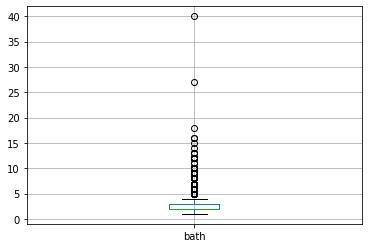

In [71]:
df[['bath']].boxplot()

In [72]:
q1 = df['bath'].quantile(0.25)
q2 = df['bath'].quantile(0.50) 
q3 = df['bath'].quantile(0.75)

iqr = q3-q1

upper_bound = q3+1.5*(iqr)
lower_bound = q1-1.5*(iqr)

print("q1 :",q1)
print("q3 :",q3)
print("iqr :",iqr)
print("upper_bound :",upper_bound)
print("lower_bound :",lower_bound)

q1 : 2.0
q3 : 3.0
iqr : 1.0
upper_bound : 4.5
lower_bound : 0.5


In [73]:
bath_mean = df[["bath"]].loc[(df['bath']<upper_bound) & (df['bath']>lower_bound)].mean()[0]
bath_mean

2.4030616399316016

In [74]:
# replacing outliers by mean
df.loc[(df['size']>upper_bound) | (df['size']<lower_bound),'size'] =bath_mean

<AxesSubplot:>

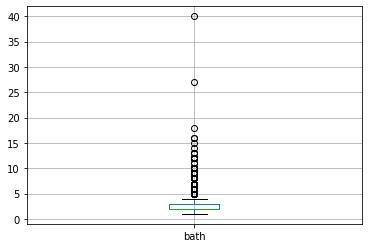

In [75]:
df[['bath']].boxplot()

<AxesSubplot:xlabel='bath'>

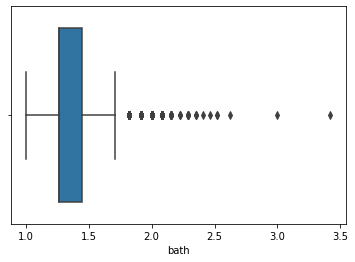

In [76]:
sns.boxplot(np.cbrt(df['bath']))

<AxesSubplot:xlabel='bath'>

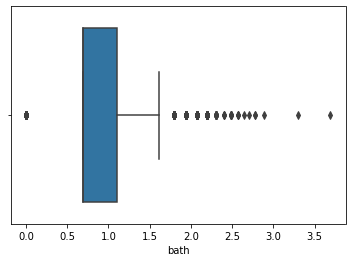

In [77]:
sns.boxplot(np.log(df['bath']))

<AxesSubplot:xlabel='bath'>

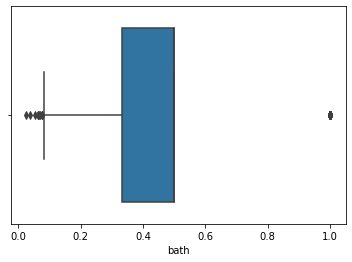

In [78]:
sns.boxplot((1/df['bath']))

#### 4. balcony

<AxesSubplot:>

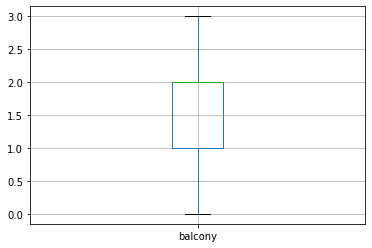

In [80]:
df[['balcony']].boxplot()     # no outliers 

# Feature Selection

In [81]:
# check linearity (corr)
df.corr()

,size,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Anekal,location_ Banaswadi,...,location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled
size,1.000000,0.601986,0.273443,0.410908,-0.008553,-0.016890,0.286241,-0.207111,-0.018549,-0.018549,...,-0.006895,-0.018549,-0.006895,0.016412,0.016412,0.004759,-0.007964,0.004759,0.004759,-0.006895
bath,0.601986,1.000000,0.207970,0.454449,-0.014629,-0.011088,0.376291,-0.271403,-0.010931,-0.010931,...,-0.004458,-0.010931,-0.010931,0.008487,0.008487,0.021432,-0.008918,0.014959,0.021432,-0.004458
balcony,0.273443,0.207970,1.000000,0.124951,-0.062810,-0.016821,-0.081458,0.115703,-0.006511,-0.017301,...,0.004280,-0.006511,-0.006511,0.015070,-0.006511,0.015070,-0.013023,0.004280,0.004280,-0.006511
price,0.410908,0.454449,0.124951,1.000000,-0.026177,-0.012553,0.272669,-0.183222,-0.005617,-0.004512,...,-0.003058,-0.004704,0.000142,0.007994,0.001596,0.002759,-0.006029,0.005086,0.009448,-0.004644
area_type_Built-up Area,-0.008553,-0.014629,-0.062810,-0.026177,1.000000,-0.038186,-0.199409,-0.656025,0.018399,-0.004081,...,-0.004081,-0.004081,-0.004081,-0.004081,-0.004081,-0.004081,-0.008162,-0.004081,-0.004081,-0.004081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
location_t.c palya,0.004759,0.021432,0.015070,0.002759,-0.004081,-0.000703,0.020464,-0.012070,-0.000075,-0.000075,...,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,1.000000,-0.000150,-0.000075,-0.000075,-0.000075
location_tc.palya,-0.007964,-0.008918,-0.013023,-0.006029,-0.008162,-0.001405,0.040933,-0.024143,-0.000150,-0.000150,...,-0.000150,-0.000150,-0.000150,-0.000150,-0.000150,-0.000150,1.000000,-0.000150,-0.000150,-0.000150
location_vinayakanagar,0.004759,0.014959,0.004280,0.005086,-0.004081,-0.000703,-0.003669,0.006220,-0.000075,-0.000075,...,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000150,1.000000,-0.000075,-0.000075
"location_white field,kadugodi",0.004759,0.021432,0.004280,0.009448,-0.004081,-0.000703,0.020464,-0.012070,-0.000075,-0.000075,...,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000150,-0.000075,1.000000,-0.000075


# Model Training

#### Train, Test split

In [82]:
x = df.drop('price', axis = 1)  # Independent variable
y = df['price']                 # Dependent variable

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size= 0.8, random_state= 4)
x_train

,size,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Anekal,location_ Banaswadi,location_ Basavangudi,...,location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled
336,2.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12969,3.0,2.0,2.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8636,3.0,12.0,2.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6567,3.0,3.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7861,3.0,4.0,2.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,3.0,5.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
709,2.0,2.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10679,3.0,3.0,2.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8366,3.0,2.0,2.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
y_train

336       45.00
12969     58.00
8636     160.00
6567     400.00
7861     138.00
          ...  
6017     101.00
709       45.00
10679    125.00
8366      58.23
1146     675.00
Name: price, Length: 10656, dtype: float64

In [85]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10656, 1312)
(10656,)
(2664, 1312)
(2664,)


#### Create instance of model

In [86]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Model Evaluation

In [87]:
# calculating values of  residual, mse, rmse, mae, r2_score

In [88]:
y_pred = model.predict(x_test)
y_pred

array([113.859375,  77.140625, 115.0625  , ...,  96.484375,  68.515625,
       110.65625 ])

In [89]:
y_test

2528     365.00
6110      55.00
1033     130.00
11476     75.00
9613      32.00
          ...  
9573      50.00
9760      35.84
11663     57.00
1003      49.00
3206      99.00
Name: price, Length: 2664, dtype: float64

In [90]:
# residual / Error = ya -yp

residual = y_test - y_pred
residual

2528     251.140625
6110     -22.140625
1033      14.937500
11476     25.515625
9613      -7.671875
            ...    
9573     -10.765625
9760     -29.160000
11663    -39.484375
1003     -19.515625
3206     -11.656250
Name: price, Length: 2664, dtype: float64

In [91]:
# Testing Dataset

y_pred = model.predict(x_test)

MSE = mean_squared_error(y_test, y_pred)
print("MSE:-->", MSE)

RMSE = np.sqrt(MSE)
print('RMSE:-->', RMSE)

MAE = mean_absolute_error(y_test, y_pred)
print('MAE:-->', MAE)

r2 = r2_score(y_test, y_pred)
print('r2:-->', r2)

MSE:--> 4.429959351304178e+25
RMSE:--> 6655793980663.898
MAE:--> 1334796978543.348
r2:--> -2.0424704140154333e+21


In [92]:
# Training  Dataset

y_pred = model.predict(x_train)

MSE = mean_squared_error(y_train, y_pred)
print("MSE:-->", MSE)

RMSE = np.sqrt(MSE)
print('RMSE:-->', RMSE)

MAE = mean_absolute_error(y_train, y_pred)
print('MAE:-->', MAE)

r2 = r2_score(y_train, y_pred)
print('r2:-->', r2)

MSE:--> 10206.220389394215
RMSE:--> 101.02584020632649
MAE:--> 42.6190966943506
r2:--> 0.5426455777173579


<AxesSubplot:xlabel='price', ylabel='Density'>

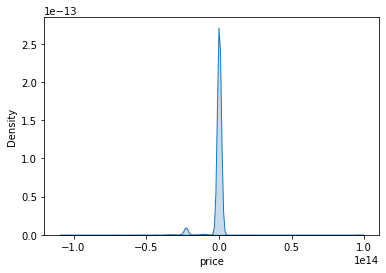

In [93]:
# normality of residual
sns.kdeplot(residual, fill=True)    # kdeplot

In [94]:
_ , p_val = shapiro(residual)        #hypothesis test #shapiro test
print("P Value", p_val)

# Significant Value 0.05

if p_val >= 0.05:
    print("Null Hypothesis is TRUE")
    print("Data is Normally Distributed")
else:
    print("Alternate Hypothesis is True")
    print("Data is not Normally Distributed")

P Value 0.0
Alternate Hypothesis is True
Data is not Normally Distributed


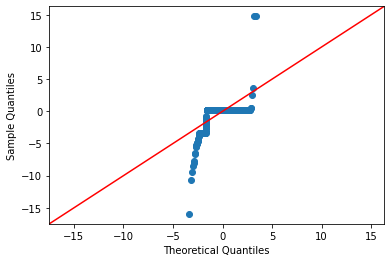

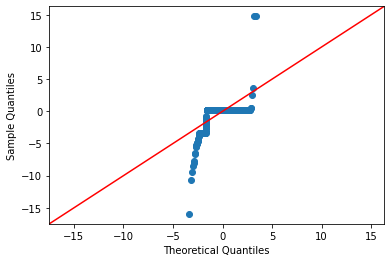

In [95]:
sm.qqplot(residual, line = '45', fit = True)       #Q-Q PLOT

<AxesSubplot:>

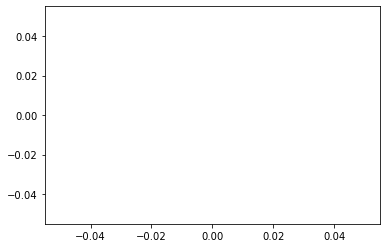

In [96]:
sns.scatterplot(x= y_train, y= residual)       # Homoscedasticity

### Testing on User Inputs

In [97]:
x.head(1).T

,0
size,2.0
bath,2.0
balcony,1.0
area_type_Built-up Area,0.0
area_type_Carpet Area,0.0
...,...
location_t.c palya,0.0
location_tc.palya,0.0
location_vinayakanagar,0.0
"location_white field,kadugodi",0.0


In [98]:
# input from user 
size = 2.0
bath = 2.0
balcony = 1.0
total_squre_fit = 2600
area_type = "Built-up  Area"  
area_type_col = "area_type_" + area_type
print(area_type_col)

location = "Kothanur"
location_col = "location_" + location
print(location_col)

area_type_Built-up  Area
location_Kothanur


In [99]:
print(size_dict)

{'2 BHK': 2, '3 BHK': 3, '4 Bedroom': 4, '4 BHK': 4, '3 Bedroom': 3, '1 BHK': 1, '2 Bedroom': 2, '5 Bedroom': 5, '6 Bedroom': 6, '1 Bedroom': 1, '8 Bedroom': 8, '7 Bedroom': 7, '5 BHK': 5, '9 Bedroom': 9, '6 BHK': 6, '7 BHK': 7, '1 RK': 1, '10 Bedroom': 10, '9 BHK': 9, '8 BHK': 8, '11 BHK': 11, '11 Bedroom': 11, '10 BHK': 10, '14 BHK': 14, '13 BHK': 13, '12 Bedroom': 12, '27 BHK': 27, '43 Bedroom': 43, '16 BHK': 16, '19 BHK': 19, '18 Bedroom': 18}


In [100]:
columns = x.columns
columns

Index(['size', 'bath', 'balcony', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'location_ Anekal',
       'location_ Banaswadi', 'location_ Basavangudi',
       ...
       'location_rr nagar', 'location_sankeswari',
       'location_sapthagiri Layout', 'location_sarjapura main road',
       'location_singapura paradise', 'location_t.c palya',
       'location_tc.palya', 'location_vinayakanagar',
       'location_white field,kadugodi', 'location_whitefiled'],
      dtype='object', length=1312)

In [101]:
project_data = {'size_dict':size_dict,'column':list(columns)}
project_data

{'size_dict': {'2 BHK': 2,
  '3 BHK': 3,
  '4 Bedroom': 4,
  '4 BHK': 4,
  '3 Bedroom': 3,
  '1 BHK': 1,
  '2 Bedroom': 2,
  '5 Bedroom': 5,
  '6 Bedroom': 6,
  '1 Bedroom': 1,
  '8 Bedroom': 8,
  '7 Bedroom': 7,
  '5 BHK': 5,
  '9 Bedroom': 9,
  '6 BHK': 6,
  '7 BHK': 7,
  '1 RK': 1,
  '10 Bedroom': 10,
  '9 BHK': 9,
  '8 BHK': 8,
  '11 BHK': 11,
  '11 Bedroom': 11,
  '10 BHK': 10,
  '14 BHK': 14,
  '13 BHK': 13,
  '12 Bedroom': 12,
  '27 BHK': 27,
  '43 Bedroom': 43,
  '16 BHK': 16,
  '19 BHK': 19,
  '18 Bedroom': 18},
 'column': ['size',
  'bath',
  'balcony',
  'area_type_Built-up  Area',
  'area_type_Carpet  Area',
  'area_type_Plot  Area',
  'area_type_Super built-up  Area',
  'location_ Anekal',
  'location_ Banaswadi',
  'location_ Basavangudi',
  'location_ Bhoganhalli',
  'location_ Devarabeesana Halli',
  'location_ Devarachikkanahalli',
  'location_ Electronic City',
  'location_ Mysore Highway',
  'location_ Rachenahalli',
  'location_ Sector 1 HSR Layout',
  'location_ Th

In [102]:
array = np.zeros(len(project_data["column"]), dtype=int)
array

array([0, 0, 0, ..., 0, 0, 0])

In [103]:
array[0]=size
array[1]=bath
array[2]=balcony
array[3]=total_squre_fit
array[project_data["column"].index(area_type_col)]=1
array[project_data["column"].index(location_col)]=1
array

array([2, 2, 1, ..., 0, 0, 0])

In [104]:
house_price_pred = model.predict([array])[0]
house_price_pred

46.859375

In [105]:
#create pickle and json file

import pickle
import json 

with open('Bengaluru_House_data.pkl', 'wb')as f:
    pickle.dump(model, f)
with open("project_data.json", 'w')as f:
    json.dump(project_data, f)